In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [ ]:
df=pd.read_csv('/content/station_day.csv')

In [ ]:
df.head()

,StationId,Date,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene,AQI,AQI_Bucket
0,AP001,2017-11-24,71.36,115.75,1.75,20.65,12.40,12.19,0.10,10.76,109.26,0.17,5.92,0.10,NaN,NaN
1,AP001,2017-11-25,81.40,124.50,1.44,20.50,12.08,10.72,0.12,15.24,127.09,0.20,6.50,0.06,184.0,Moderate
2,AP001,2017-11-26,78.32,129.06,1.26,26.00,14.85,10.28,0.14,26.96,117.44,0.22,7.95,0.08,197.0,Moderate
3,AP001,2017-11-27,88.76,135.32,6.60,30.85,21.77,12.91,0.11,33.59,111.81,0.29,7.63,0.12,198.0,Moderate
4,AP001,2017-11-28,64.18,104.09,2.56,28.07,17.01,11.42,0.09,19.00,138.18,0.17,5.02,0.07,188.0,Moderate


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 108035 entries, 0 to 108034
Data columns (total 16 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   StationId   108035 non-null  object 
 1   Date        108035 non-null  object 
 2   PM2.5       86410 non-null   float64
 3   PM10        65329 non-null   float64
 4   NO          90929 non-null   float64
 5   NO2         91488 non-null   float64
 6   NOx         92535 non-null   float64
 7   NH3         59930 non-null   float64
 8   CO          95037 non-null   float64
 9   SO2         82831 non-null   float64
 10  O3          82467 non-null   float64
 11  Benzene     76580 non-null   float64
 12  Toluene     69333 non-null   float64
 13  Xylene      22898 non-null   float64
 14  AQI         87025 non-null   float64
 15  AQI_Bucket  87025 non-null   object 
dtypes: float64(13), object(3)
memory usage: 13.2+ MB


In [ ]:
df.describe()

,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene,AQI
count,86410.000000,65329.000000,90929.000000,91488.000000,92535.000000,59930.000000,95037.000000,82831.000000,82467.000000,76580.000000,69333.000000,22898.000000,87025.000000
mean,80.272571,157.968427,23.123424,35.240760,41.195055,28.732875,1.605749,12.257634,38.134836,3.358029,15.345394,2.423446,179.749290
std,76.526403,123.418672,34.491019,29.510827,45.145976,24.897797,4.369578,12.984723,39.128004,11.156234,29.348587,6.472409,131.324339
min,0.020000,0.010000,0.010000,0.010000,0.000000,0.010000,0.000000,0.010000,0.010000,0.000000,0.000000,0.000000,8.000000
25%,31.880000,70.150000,4.840000,15.090000,13.970000,11.900000,0.530000,5.040000,18.895000,0.160000,0.690000,0.000000,86.000000
50%,55.950000,122.090000,10.290000,27.210000,26.660000,23.590000,0.910000,8.950000,30.840000,1.210000,4.330000,0.400000,132.000000
75%,99.920000,208.670000,24.980000,46.930000,50.500000,38.137500,1.450000,14.920000,47.140000,3.610000,17.510000,2.110000,254.000000
max,1000.000000,1000.000000,470.000000,448.050000,467.630000,418.900000,175.810000,195.650000,963.000000,455.030000,454.850000,170.370000,2049.000000


In [ ]:
df.size

1728560

In [ ]:
df.nunique()

,0
StationId,110
Date,2009
PM2.5,22395
PM10,29575
NO,11963
NO2,12050
NOx,15608
NH3,9119
CO,2352
SO2,5801


In [ ]:
df.isnull().sum()

,0
StationId,0
Date,0
PM2.5,21625
PM10,42706
NO,17106
NO2,16547
NOx,15500
NH3,48105
CO,12998
SO2,25204


In [ ]:
df.columns

Index(['StationId', 'Date', 'PM2.5', 'PM10', 'NO', 'NO2', 'NOx', 'NH3', 'CO',
       'SO2', 'O3', 'Benzene', 'Toluene', 'Xylene', 'AQI', 'AQI_Bucket'],
      dtype='object')

In [ ]:
df.StationId.nunique()

110

In [ ]:
groupby_station=df.groupby('StationId')
groupby_station.head()

,StationId,Date,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene,AQI,AQI_Bucket
0,AP001,2017-11-24,71.36,115.75,1.75,20.65,12.40,12.19,0.10,10.76,109.26,0.17,5.92,0.10,NaN,NaN
1,AP001,2017-11-25,81.40,124.50,1.44,20.50,12.08,10.72,0.12,15.24,127.09,0.20,6.50,0.06,184.0,Moderate
2,AP001,2017-11-26,78.32,129.06,1.26,26.00,14.85,10.28,0.14,26.96,117.44,0.22,7.95,0.08,197.0,Moderate
3,AP001,2017-11-27,88.76,135.32,6.60,30.85,21.77,12.91,0.11,33.59,111.81,0.29,7.63,0.12,198.0,Moderate
4,AP001,2017-11-28,64.18,104.09,2.56,28.07,17.01,11.42,0.09,19.00,138.18,0.17,5.02,0.07,188.0,Moderate
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
107221,WB013,2018-04-10,34.38,57.00,NaN,40.97,NaN,2.52,1.00,25.46,NaN,NaN,NaN,NaN,NaN,NaN
107222,WB013,2018-04-11,29.00,50.87,3.26,34.03,45.29,3.59,0.98,10.32,30.99,4.64,0.88,NaN,73.0,Satisfactory
107223,WB013,2018-04-12,21.70,43.04,3.49,39.49,42.54,3.77,0.73,NaN,43.72,5.33,1.76,NaN,60.0,Satisfactory
107224,WB013,2018-04-13,23.09,46.49,3.69,33.03,36.72,3.88,0.98,NaN,41.65,6.78,2.23,NaN,74.0,Satisfactory


In [ ]:
# Fill missing values in numerical columns with the mean
for col in df.select_dtypes(include=np.number):
    df[col] = df[col].fillna(df[col].mean())


In [ ]:
df.isnull().sum()

,0
StationId,0
Date,0
PM2.5,0
PM10,0
NO,0
NO2,0
NOx,0
NH3,0
CO,0
SO2,0


In [ ]:
 # Group by 'StationId' and calculate the mean of 'AQI'
aqi_by_station = df.groupby('StationId')['AQI'].mean().head(10).sort_values(ascending=False)
aqi_by_station



,AQI
StationId,
BR007,232.600328
BR010,203.613863
BR005,148.287411
AS001,140.663835
BR006,140.278873
BR009,136.753912
AP005,129.705912
BR008,128.757820
AP001,105.067741


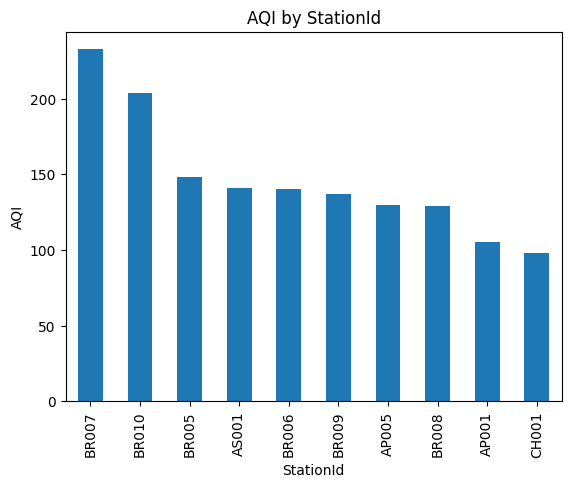

In [ ]:
aqi_by_station.plot(kind='bar')
plt.xlabel('StationId')
plt.ylabel('AQI')
plt.title('AQI by StationId')
plt.show()

In [ ]:
aqi_bucket_mapping = {
    'Good': 1,
    'Satisfactory': 2,
    'Moderate': 3,
    'Poor': 4,
    'Very Poor': 5,
    'Severe': 6
}

df['AQI_Bucket_Num'] = df['AQI_Bucket'].map(aqi_bucket_mapping)

# Handle potential NaN values introduced by the mapping
df['AQI_Bucket_Num'].fillna(df['AQI_Bucket_Num'].median(), inplace = True)

# Replace NaN values in 'AQI_Bucket' with the most frequent value
df['AQI_Bucket'].fillna(most_frequent_aqi_bucket, inplace=True)


In [ ]:
df.head()

,StationId,Date,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene,AQI,AQI_Bucket
0,AP001,2017-11-24,71.36,115.75,1.75,20.65,12.40,12.19,0.10,10.76,109.26,0.17,5.92,0.10,179.74929,Moderate
1,AP001,2017-11-25,81.40,124.50,1.44,20.50,12.08,10.72,0.12,15.24,127.09,0.20,6.50,0.06,184.00000,Moderate
2,AP001,2017-11-26,78.32,129.06,1.26,26.00,14.85,10.28,0.14,26.96,117.44,0.22,7.95,0.08,197.00000,Moderate
3,AP001,2017-11-27,88.76,135.32,6.60,30.85,21.77,12.91,0.11,33.59,111.81,0.29,7.63,0.12,198.00000,Moderate
4,AP001,2017-11-28,64.18,104.09,2.56,28.07,17.01,11.42,0.09,19.00,138.18,0.17,5.02,0.07,188.00000,Moderate


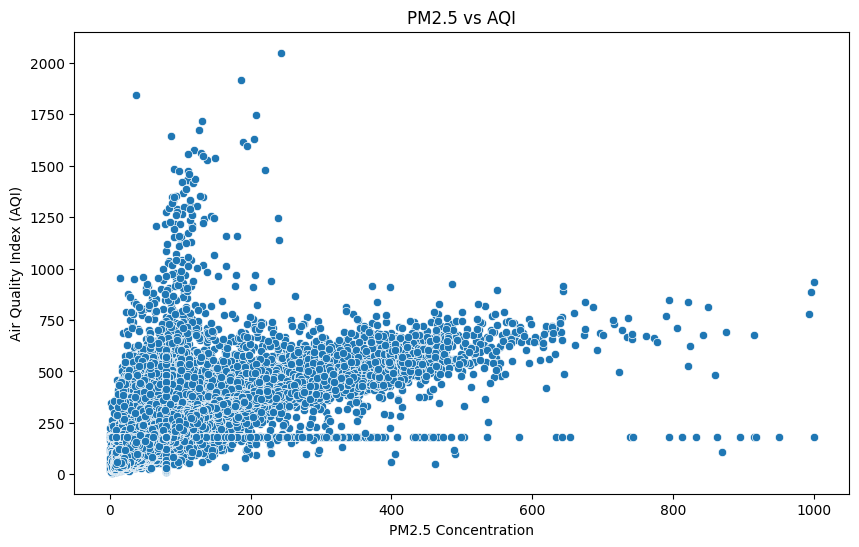

Correlation between PM2.5 and AQI: 0.78536221182428


In [ ]:
# Create a scatter plot of PM2.5 vs AQI
plt.figure(figsize=(10, 6))
sns.scatterplot(x='PM2.5', y='AQI', data=df)
plt.title('PM2.5 vs AQI')
plt.xlabel('PM2.5 Concentration')
plt.ylabel('Air Quality Index (AQI)')
plt.show()

# Calculate the correlation between PM2.5 and AQI
correlation = df['PM2.5'].corr(df['AQI'])
print(f"Correlation between PM2.5 and AQI: {correlation}")


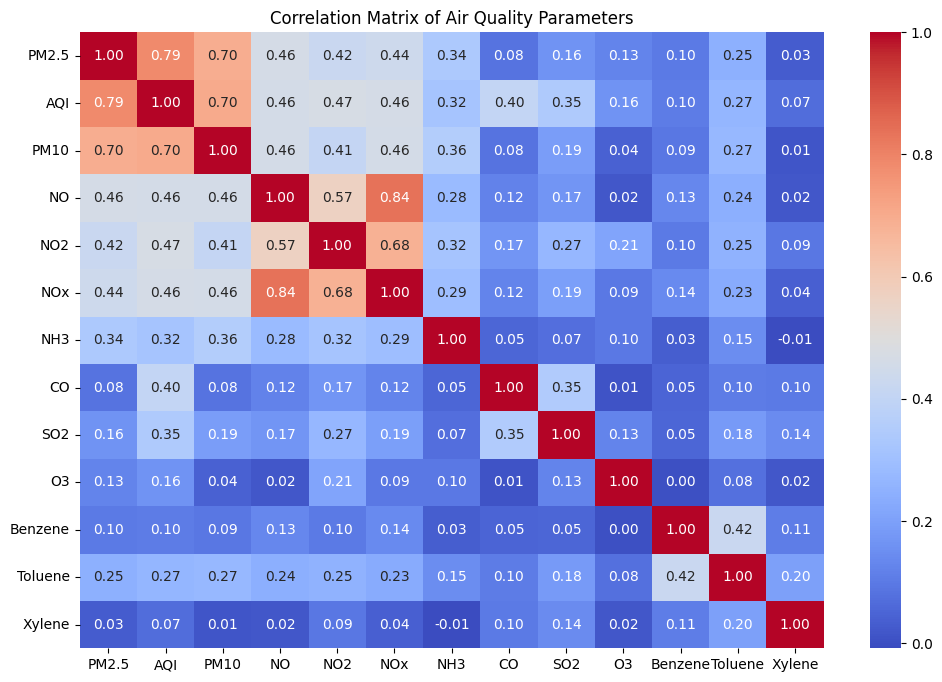

In [ ]:
# Calculate the correlation matrix
correlation_matrix = df[['PM2.5', 'AQI', 'PM10', 'NO', 'NO2', 'NOx', 'NH3', 'CO', 'SO2', 'O3', 'Benzene', 'Toluene', 'Xylene']].corr()

# Create the heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of Air Quality Parameters')
plt.show()


                count        mean         std    min       25%      50%  \
AQI_Bucket                                                                
Good           5510.0   20.665636   19.145906   0.16   10.4225   15.150   
Moderate      50427.0   67.012561   29.619505   0.02   50.7700   76.120   
Poor          11493.0   95.868815   30.587808   0.75   79.9000   98.100   
Satisfactory  23636.0   34.599372   18.555399   0.04   21.8300   31.435   
Severe         5207.0  260.023114  126.245981  10.32  182.8050  266.950   
Very Poor     11762.0  162.012052   50.961327   1.75  130.6700  158.680   

                     75%      max  
AQI_Bucket                         
Good           21.757500   163.16  
Moderate       80.272571   999.99  
Poor          112.740000   536.95  
Satisfactory   43.212500   489.88  
Severe        330.060000  1000.00  
Very Poor     194.087500   532.90  


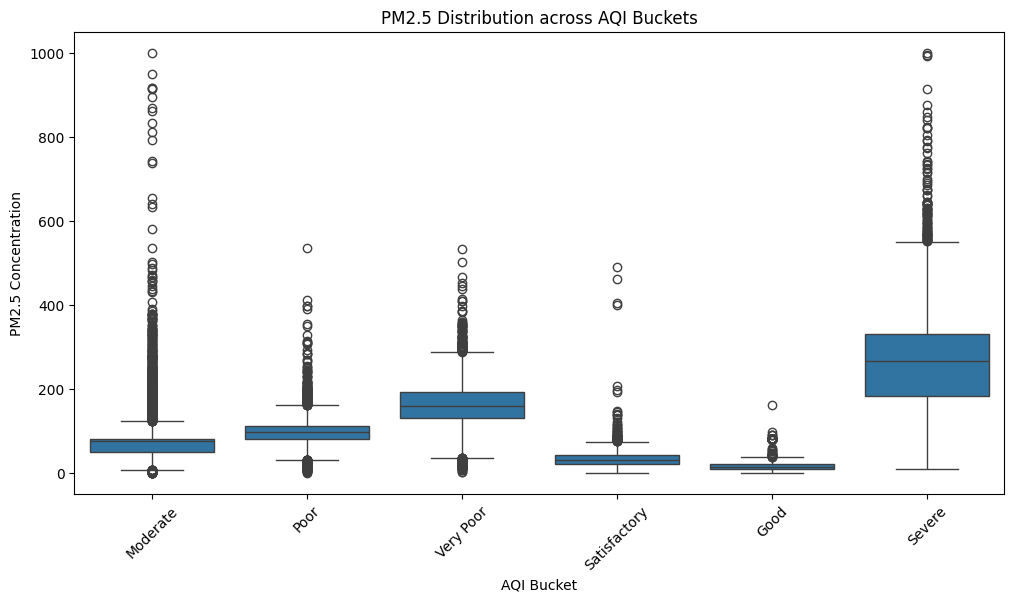

In [ ]:
# Group by AQI buckets and analyze PM2.5 distribution
aqi_buckets = df.groupby('AQI_Bucket')['PM2.5'].describe()
print(aqi_buckets)

# Visualize the PM2.5 distribution within each AQI bucket using box plots
plt.figure(figsize=(12, 6))
sns.boxplot(x='AQI_Bucket', y='PM2.5', data=df)
plt.title('PM2.5 Distribution across AQI Buckets')
plt.xlabel('AQI Bucket')
plt.ylabel('PM2.5 Concentration')
plt.xticks(rotation=45)
plt.show()

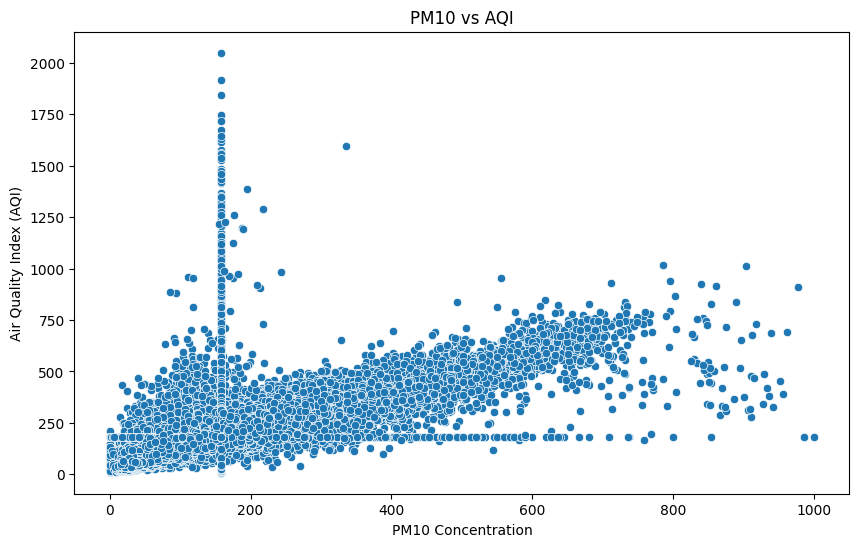

Correlation between PM10 and AQI: 0.7016630008075561


In [ ]:
# Create a scatter plot of PM10 vs AQI
plt.figure(figsize=(10, 6))
sns.scatterplot(x='PM10', y='AQI', data=df)
plt.title('PM10 vs AQI')
plt.xlabel('PM10 Concentration')
plt.ylabel('Air Quality Index (AQI)')
plt.show()

# Calculate the correlation between PM10 and AQI
correlation_pm10_aqi = df['PM10'].corr(df['AQI'])
print(f"Correlation between PM10 and AQI: {correlation_pm10_aqi}")


                count        mean         std    min     25%    50%  \
AQI_Bucket                                                            
Good           5510.0   39.801270    8.141530    8.0   34.25   42.0   
Moderate      50427.0  155.937565   29.377974  101.0  127.00  175.0   
Poor          11493.0  247.661707   29.537546  201.0  221.00  246.0   
Satisfactory  23636.0   76.795439   14.194043   51.0   65.00   77.0   
Severe         5207.0  511.560015  148.195853  401.0  426.00  466.0   
Very Poor     11762.0  341.033838   26.925688  301.0  318.00  337.0   

                    75%     max  
AQI_Bucket                       
Good           46.00000    50.0  
Moderate      179.74929   200.0  
Poor          274.00000   300.0  
Satisfactory   89.00000   100.0  
Severe        544.00000  2049.0  
Very Poor     361.00000   400.0  


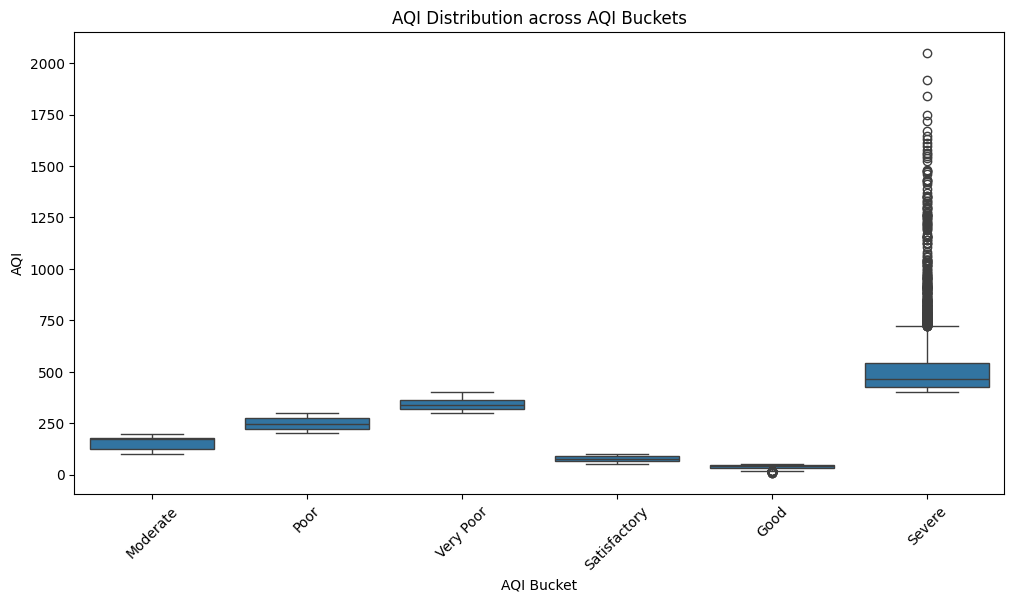

Correlation between AQI and AQI Bucket (numerical): 0.919254954916832


In [ ]:
# Group data by AQI bucket and get descriptive statistics for AQI
aqi_by_bucket = df.groupby('AQI_Bucket')['AQI'].describe()
print(aqi_by_bucket)

# Visualize the distribution of AQI within each bucket using box plots
plt.figure(figsize=(12, 6))
sns.boxplot(x='AQI_Bucket', y='AQI', data=df)
plt.title('AQI Distribution across AQI Buckets')
plt.xlabel('AQI Bucket')
plt.ylabel('AQI')
plt.xticks(rotation=45)
plt.show()


correlation_aqi_bucket = df['AQI'].corr(df['AQI_Bucket_Num'])
print(f"Correlation between AQI and AQI Bucket (numerical): {correlation_aqi_bucket}")


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score,mean_absolute_error,max_error
from sklearn.preprocessing import StandardScaler

# Feature Selection (Example: Using PM2.5, PM10 as features)
features = ['PM2.5', 'PM10']
target = 'AQI'

X = df[features]
y = df[target]

# Handle any remaining missing values (if any) - impute or remove rows
X.fillna(X.mean(), inplace=True)  # Or another suitable imputation method


# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


# Scale the features using StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


# Model Training and Evaluation
models = {
    'Linear Regression': LinearRegression(),
    'Random Forest': RandomForestRegressor(random_state=42),
    'Gradient Boosting': GradientBoostingRegressor(random_state=42)
}

results = {}
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    mae=mean_absolute_error(y_test, y_pred)
    me=max_error(y_test, y_pred)
    results[name] = {'MSE': mse, 'R-squared': r2,'mean_absolute_error':mae,'max_error':me}

# Print results
for name, metrics in results.items():
    print(f'{name}:')
    print(f'  MSE: {metrics["MSE"]:.2f}')
    print(f'  R-squared: {metrics["R-squared"]:.2f}')
    print(f'  mean_absolute_error: {metrics["mean_absolute_error"]:.2f}')
    print(f'  max_error: {metrics["max_error"]:.2f}')
    print("-"*20)

# Determine the best model based on a chosen metric (e.g., R-squared)
best_model_name = max(results, key=lambda k: results[k]['R-squared'])
print(f"The best performing model is: {best_model_name}")


Linear Regression:
  MSE: 4685.66
  R-squared: 0.67
  mean_absolute_error: 37.02
  max_error: 1441.56
--------------------
Random Forest:
  MSE: 4768.26
  R-squared: 0.66
  mean_absolute_error: 32.45
  max_error: 1309.67
--------------------
Gradient Boosting:
  MSE: 3775.16
  R-squared: 0.73
  mean_absolute_error: 29.58
  max_error: 1384.48
--------------------
The best performing model is: Gradient Boosting
